# Inteligencia de Negocios - Proyecto 1 (Etapa 1)

Integrantes:
- Maria Alejandra Lizarazo - 202021385
- Daniel Gómez Rey - 202122586
- Alejandro Gonzalez Salazar- 201921465




# 1. Entendimiento de los datos

Declaración de las librerias a utilizar durante la etapa 1 del proyecto:



In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install langdetect
!pip install contractions
!pip install ftfy
!pip install num2words
!pip install pandas-profiling
!pip install sklearn
# Librerias generales
import sys

# Pandas
import pandas as pd

# Numpy
import numpy as np
np.random.seed(7247)

# Seaborn
import seaborn as sns

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Scikit-learn
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

Mediante el siguiente codigo cargaremos los datos con las librerias anteriormente declaradas. Adicionalmente, podemos hacer un breve acercamiento a la estructura del dataframe:



##1.1 Carga de datos

In [3]:
# Carga de los datos
ods_data = pd.read_excel('/content/ODScat_345.xlsx')

# Cantidad de filas y columnas
num_filas = ods_data.shape[0]
num_columnas = ods_data.shape[1]

# Imprimir el mensaje con el formato deseado
print(f"El archivo tiene {num_filas} filas y {num_columnas} columnas.")

# Información inicial del DataFrame
print("Primeros 6 valores del DataFrame: ")
display(ods_data.head(6))

# Información final del DataFrame
print("Ultimos 6 valores del DataFrame: ")
display(ods_data.tail(6))

El archivo tiene 4049 filas y 2 columnas.
Primeros 6 valores del DataFrame: 


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
5,Probar pronto la medicina rural puede crear el...,3


Ultimos 6 valores del DataFrame: 


,Textos_espanol,sdg
4043,Este resultado debe interpretarse con cuidado....,5
4044,"Para ello, identificará las cuestiones de géne...",5
4045,La participación de las mujeres en roles de li...,5
4046,"Según el WEF, según las tendencias de 2016, po...",5
4047,"Sirve como recurso y foro para las agencias, c...",5
4048,Las áreas útiles para un mayor estudio y acció...,5


## 1.2 Manipulación de los datos

Podemos observar el nombre de los titulos de las columnas, adicionalmente, el tipo de dato que se maneja en ellas:

In [4]:
# Tipos de las colummnas del DataFrame
ods_data.dtypes

,0
Textos_espanol,object
sdg,int64


In [5]:
# Calidad de los datos
ods_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


Para un entendimiento mas detallado de nuestro DataFrame, calculamos la cantidad de veces que se repite cada uno de los ODS asignados a cada opinion.

In [6]:
# Conteo de cuantas veces se repite el tipo de ODS
tabla_conteo = ods_data['sdg'].value_counts().to_frame().reset_index()
tabla_conteo.columns = ['Valor ODS', 'Conteo']
display(tabla_conteo)




,Valor ODS,Conteo
0,5,1451
1,4,1354
2,3,1244


Verificamos la cantidad de valores nulos en las columnas:

###1.2.1 Cantidad de nulos

In [7]:
valores_faltantes = ods_data['Textos_espanol'].isnull().sum()
valores_faltantesSDG = ods_data['sdg'].isnull().sum()
print(f"Hay {valores_faltantes} valores faltantes en la columna 'Textos_espanol'")
print(f"Hay {valores_faltantesSDG} valores faltantes en la columna 'sdg'")


Hay 0 valores faltantes en la columna 'Textos_espanol'
Hay 0 valores faltantes en la columna 'sdg'


Realizamos una grafica para analizar la distribución de la longitud de caracteres para identificar la cantidad de textos muy cortos o muy largos que pueden requerir atención especial.

###1.2.2 Graficas

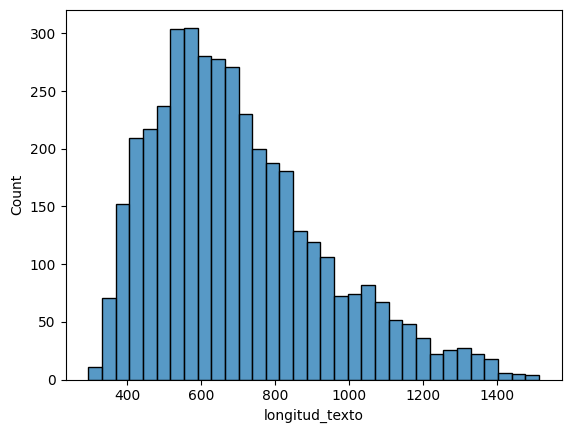

In [8]:
ods_data['longitud_texto'] = ods_data['Textos_espanol'].apply(len)
sns.histplot(ods_data['longitud_texto'])
plt.show()

Distribución de valores de la columna SDG

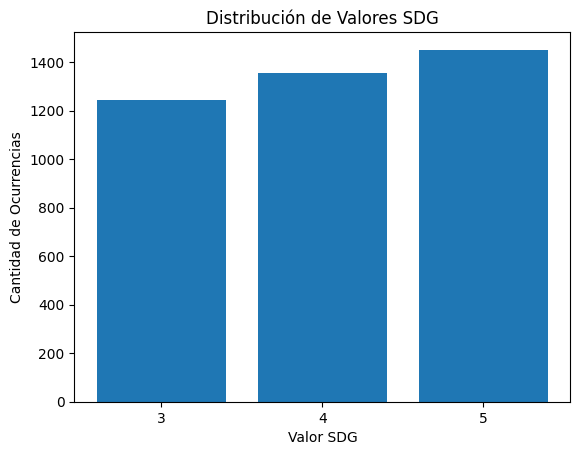

In [9]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada valor
conteo_sdg = ods_data['sdg'].value_counts()

# Crear la gráfica de barras
plt.bar(conteo_sdg.index, conteo_sdg.values)
plt.xlabel('Valor SDG')
plt.ylabel('Cantidad de Ocurrencias')
plt.title('Distribución de Valores SDG')

# Especificar las etiquetas del eje x
plt.xticks([3, 4, 5])

plt.show()

###1.2.3 Duplicados

Verificamos si existen filas duplicadas en nuestro DataFrame

In [10]:
filas_duplicadas = ods_data[ods_data.duplicated()]
display(filas_duplicadas)

filas_duplicadas_ = ods_data.duplicated()
print(filas_duplicadas_.sum())

,Textos_espanol,sdg,longitud_texto


0


###1.2.4 identificar idiomas del texto

Detectamos si los valores de nuestra columna esta en un idioma diferente al español

In [11]:
from langdetect import detect

ods_data['idioma_detectado'] = ods_data['Textos_espanol'].apply(detect)
textos_no_espanol = ods_data[ods_data['idioma_detectado'] != 'es']
print(textos_no_espanol[['Textos_espanol', 'idioma_detectado']])

                                         Textos_espanol idioma_detectado
324   Urban Poverty and Household Strategies in Dhak...               en
591   American Journal of Managed Care 13,670-676. T...               en
786   Reacciones adversas a medicamentos como causa ...               en
960   Aumento de la longevidad y gastos de Medicare....               en
1077  Dans le cours de cette etude, les comparaisons...               fr
1764  International Handbook on the Preparation and ...               en
2003  Ponencia presentada en el Taller FAO-FIDA-OIT ...               en
2613  París: Organización de Cooperación y Desarroll...               en
2834  Par ailleurs, les resultats suggerent que l'ef...               fr
3329  Treatment satisfaction and recovery in Saami a...               en
3473  Les taux d'emploi feminins reagissent aux vari...               fr
3550  Enfin, il analyse, a partir des Statistiques d...               fr
3655  La protection economique des femmes en age av

In [12]:
# Contar textos en español y otros idiomas
num_espanol = ods_data[ods_data['idioma_detectado'] == 'es'].shape[0]
num_otros = ods_data[ods_data['idioma_detectado'] != 'es'].shape[0]
total_textos = ods_data.shape[0]

# Calcular porcentajes
porcentaje_espanol = (num_espanol / total_textos) * 100
porcentaje_otros = (num_otros / total_textos) * 100

# Imprimir resultados
print(f"Porcentaje de textos en español: {porcentaje_espanol:.2f}%")
print(f"Porcentaje de textos en otros idiomas: {porcentaje_otros:.2f}%")

Porcentaje de textos en español: 99.65%
Porcentaje de textos en otros idiomas: 0.35%


Identificamos los otros idiomas:

In [13]:

conteo_idiomas = ods_data['idioma_detectado'].value_counts()
print(conteo_idiomas)


idioma_detectado
es    4035
en       8
fr       6
Name: count, dtype: int64


In [14]:
# Traducir las filas que estan en ingles y frances al espanol.

from googletrans import Translator

translator = Translator()

def traducir_texto(texto, idioma_origen):
  if idioma_origen in ['en', 'fr']:
    try:
      traduccion = translator.translate(texto, dest='es', src=idioma_origen)
      return traduccion.text
    except:
      return texto
  else:
    return texto

ods_data['Textos_espanol'] = ods_data.apply(lambda x: traducir_texto(x['Textos_espanol'], x['idioma_detectado']), axis=1)


In [15]:
ods_data['idioma_detectado'] = ods_data['Textos_espanol'].apply(detect)
conteo_idiomas = ods_data['idioma_detectado'].value_counts()
print(conteo_idiomas)


idioma_detectado
es    4049
Name: count, dtype: int64


#2. Preparación de texto

In [16]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
textos = ods_data.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
#textos['Moda'] =
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
#ProfileReport(textos)

In [19]:
textos


,Textos_espanol,sdg,longitud_texto,idioma_detectado,Conteo,Max,Min
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,944,18,1
1,"En 2007, el gobierno central financió directam...",3,476,es,476,14,1
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,1207,15,1
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,1090,17,1
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,895,13,1
...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,es,822,16,1
4045,La participación de las mujeres en roles de li...,5,514,es,514,16,1
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,es,445,17,1
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,es,1017,15,1


##2.1 Limpieza de datos

In [20]:

import unicodedata
import re

def remove_non_ascii(words):
    # Remove non-ASCII characters from list of tokenized words
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    # Convert all characters to lowercase from list of tokenized words
    new_words = []
    for word in words:
        if word is not None:
          new_word = word.lower()
          new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    # Remove punctuation from list of tokenized words
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    # Remove stop words from list of tokenized words
    new_words = []
    stop_words = set(stopwords.words("spanish"))
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


##2.2 Tokenizacion

In [21]:

import contractions
ods_data['Textos_espanol'] = ods_data['Textos_espanol'].apply(contractions.fix)


In [22]:

from nltk import word_tokenize, sent_tokenize
ods_data['words'] = ods_data['Textos_espanol'].apply(word_tokenize)
ods_data.head()


,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ..."
1,"En 2007, el gobierno central financió directam...",3,476,es,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,"[El, consumo, anual, de, alcohol, se, estima, ..."


In [23]:
ods_data['words'].dropna()

,words
0,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ..."
1,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"[El, consumo, anual, de, alcohol, se, estima, ..."
...,...
4044,"[Para, ello, ,, identificará, las, cuestiones,..."
4045,"[La, participación, de, las, mujeres, en, role..."
4046,"[Según, el, WEF, ,, según, las, tendencias, de..."
4047,"[Sirve, como, recurso, y, foro, para, las, age..."


In [24]:
 ods_data.shape

(4049, 5)

In [25]:
 ods_data['words'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4049 entries, 0 to 4048
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
4049 non-null   object
dtypes: object(1)
memory usage: 31.8+ KB


In [26]:
ods_data.head(18)

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,"[Por, ejemplo, ,, el, nÃºmero, de, consultas, ..."
1,"En 2007, el gobierno central financió directam...",3,476,es,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,"[El, consumo, anual, de, alcohol, se, estima, ..."
5,Probar pronto la medicina rural puede crear el...,3,710,es,"[Probar, pronto, la, medicina, rural, puede, c..."
6,La duración media de la estancia en el hospita...,3,1041,es,"[La, duración, media, de, la, estancia, en, el..."
7,"El período retrospectivo es de 20 años, de 195...",3,386,es,"[El, período, retrospectivo, es, de, 20, años,..."
8,Ya se están vinculando algunos datos de los re...,3,886,es,"[Ya, se, están, vinculando, algunos, datos, de..."
9,"En este sentido, es una forma eficaz de mejora...",3,862,es,"[En, este, sentido, ,, es, una, forma, eficaz,..."


Corregimos codificación:

In [27]:
import ftfy

def corregir_codificacion(words):
  # Corrige la codificación de palabras en una lista
  palabras_corregidas = []
  for word in words:
    palabra_corregida = ftfy.fix_text(word)
    palabras_corregidas.append(palabra_corregida)
  return palabras_corregidas

ods_data['words'] = ods_data['words'].apply(corregir_codificacion)
ods_data.head(10)

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,"[Por, ejemplo, ,, el, número, de, consultas, e..."
1,"En 2007, el gobierno central financió directam...",3,476,es,"[En, 2007, ,, el, gobierno, central, financió,..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,"[Claramente, ,, hay, muchos, otros, factores, ..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,"[Por, ejemplo, ,, el, estado, australiano, de,..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,"[El, consumo, anual, de, alcohol, se, estima, ..."
5,Probar pronto la medicina rural puede crear el...,3,710,es,"[Probar, pronto, la, medicina, rural, puede, c..."
6,La duración media de la estancia en el hospita...,3,1041,es,"[La, duración, media, de, la, estancia, en, el..."
7,"El período retrospectivo es de 20 años, de 195...",3,386,es,"[El, período, retrospectivo, es, de, 20, años,..."
8,Ya se están vinculando algunos datos de los re...,3,886,es,"[Ya, se, están, vinculando, algunos, datos, de..."
9,"En este sentido, es una forma eficaz de mejora...",3,862,es,"[En, este, sentido, ,, es, una, forma, eficaz,..."


eliminar ruido

In [28]:
from nltk.corpus import stopwords

#Aplica la eliminación del ruido
ods_data['words']=ods_data['words'].apply(preprocessing)

ods_data.head(10)

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,"[ejemplo, numero, consultas, externas, especia..."
1,"En 2007, el gobierno central financió directam...",3,476,es,"[2007, gobierno, central, financio, directamen..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,"[claramente, factores, juego, particular, vari..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,"[ejemplo, australiano, victoria, creo, agencia..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,"[consumo, anual, alcohol, estima, 157, litros,..."
5,Probar pronto la medicina rural puede crear el...,3,710,es,"[probar, pronto, medicina, rural, puede, crear..."
6,La duración media de la estancia en el hospita...,3,1041,es,"[duracion, media, estancia, hospital, alos, ut..."
7,"El período retrospectivo es de 20 años, de 195...",3,386,es,"[periodo, retrospectivo, 20, anos, 1951, 2001,..."
8,Ya se están vinculando algunos datos de los re...,3,886,es,"[estan, vinculando, datos, registros, incluido..."
9,"En este sentido, es una forma eficaz de mejora...",3,862,es,"[forma, eficaz, mejorar, eficacia, calidad, se..."


##2.3 Normalización

In [29]:

def stem_words(words):
    # Stem words in list of tokenized words
    stemmer = nltk.stem.SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    # Lemmatize verbs in list of tokenized words
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas
    return words

# Aplica lematización y Eliminación de Prefijos y Sufijos.
ods_data['words'] = ods_data['words'].apply(stem_and_lemmatize)
ods_data.head()


,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,"[ejempl, numer, consult, extern, especial, 319..."
1,"En 2007, el gobierno central financió directam...",3,476,es,"[2007, gobiern, central, financi, direct, sol,..."
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,"[clar, factor, jueg, particul, varied, barrer,..."
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,"[ejempl, australian, victori, cre, agenci, pro..."
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,"[consum, anual, alcohol, estim, 157, litr, ano..."


##2.4 Selección de campos


In [30]:
ods_data['words'] = ods_data['words'].apply(lambda x: ' '.join(map(str, x)))
ods_data

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,ejempl numer consult extern especial 319 cad m...
1,"En 2007, el gobierno central financió directam...",3,476,es,2007 gobiern central financi direct sol 03 gas...
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,clar factor jueg particul varied barrer determ...
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,ejempl australian victori cre agenci promocion...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,consum anual alcohol estim 157 litr ano hombr ...
...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,es,ello identific cuestion gener mas destac malt ...
4045,La participación de las mujeres en roles de li...,5,514,es,particip mujer rol liderazg dentr legislatur t...
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,es,segun wef segun tendenci 2016 podri cerr dentr...
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,es,sirv recurs for agenci objet logr enfoqu integ...


In [31]:
X_data, y_data = ods_data['words'],ods_data['sdg']
y_data

,sdg
0,3
1,3
2,3
3,3
4,3
...,...
4044,5
4045,5
4046,5
4047,5


Transformacion binaria


In [32]:
X_data = X_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(4049, 26363)


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(4049, 26363)


array([0, 0, 0, ..., 0, 0, 0])

In [35]:
ods_data.head()

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,ejempl numer consult extern especial 319 cad m...
1,"En 2007, el gobierno central financió directam...",3,476,es,2007 gobiern central financi direct sol 03 gas...
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,clar factor jueg particul varied barrer determ...
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,ejempl australian victori cre agenci promocion...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,consum anual alcohol estim 157 litr ano hombr ...


In [36]:
print(ods_data['words'].iloc[0])

ejempl numer consult extern especial 319 cad mil derechohabient sp compar 338 620 cad mil derechohabient imss issste respect si bien diferent pued reflej neces desigual poblacion liger mayor issste pued justific maner numer recet pud ser surt total farmaceut deb falt existent 33 dentr sp compar 14 dentr imss segun dat encuest aunqu propi cifr institut ss sugier tas mas altas recet surt ambas cifr encuentr mas altas ocde gast bolsill reduc signific ultim dec pes esfuerz logr cobertur sanitari universal trav reform sp ejemplo numero consultas externas especialistas 319 cada mil derechohabientes sp comparacion 338 620 cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias 33 dentro sp comparacion 14 dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas

Pasamos los numeros a letras

In [37]:
import re
from num2words import num2words

def numeros_a_letras_en_texto(texto):
    # Convierte los números en un texto a letras en español
    palabras = texto.split()
    palabras_convertidas = []
    for palabra in palabras:
        if palabra.isdigit():
            palabra_convertida = num2words(int(palabra), lang='es')
        else:
            palabra_convertida = palabra
        palabras_convertidas.append(palabra_convertida)
    return ' '.join(palabras_convertidas)

# Aplica la función a la columna 'words'
ods_data['words'] = ods_data['words'].apply(numeros_a_letras_en_texto)

# Muestra el DataFrame para verificar los cambios
ods_data.head()

,Textos_espanol,sdg,longitud_texto,idioma_detectado,words
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,es,ejempl numer consult extern especial trescient...
1,"En 2007, el gobierno central financió directam...",3,476,es,dos mil siete gobiern central financi direct s...
2,"Claramente, hay muchos otros factores en juego...",3,1207,es,clar factor jueg particul varied barrer determ...
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,es,ejempl australian victori cre agenci promocion...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,es,consum anual alcohol estim ciento cincuenta y ...


# 3. Implementación de algoritmos:

##3.1 Naive Bayes usando CountVectorizer

Exactitud del modelo: 0.9621

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.98      0.94      0.96       388
           4       0.96      0.97      0.96       415
           5       0.95      0.98      0.96       412

    accuracy                           0.96      1215
   macro avg       0.96      0.96      0.96      1215
weighted avg       0.96      0.96      0.96      1215



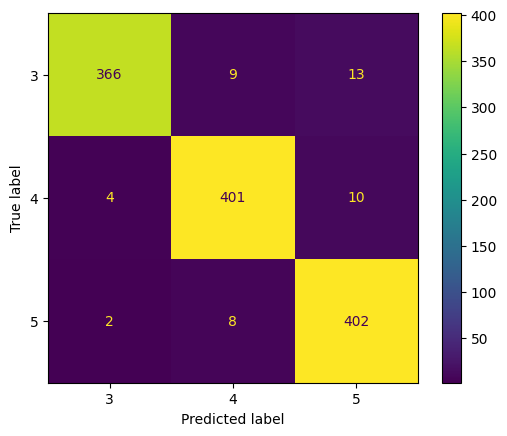


Matriz de confusión:
 [[366   9  13]
 [  4 401  10]
 [  2   8 402]]


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar features (X) y etiquetas (y)
X_data = ods_data['words']
y_data = ods_data['sdg']

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Vectorización binaria con CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inicializar y entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Hacer predicciones
y_pred = nb_model.predict(X_test_vec)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Vizualizar matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=nb_model.classes_)
disp.plot()
plt.show()

# Matriz de confusión
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))




Reporte de Clasificación:

              precision    recall  f1-score     support
3              0.983871  0.943299  0.963158   388.00000
4              0.959330  0.966265  0.962785   415.00000
5              0.945882  0.975728  0.960573   412.00000
accuracy       0.962140  0.962140  0.962140     0.96214
macro avg      0.963028  0.961764  0.962172  1215.00000
weighted avg   0.962607  0.962140  0.962154  1215.00000


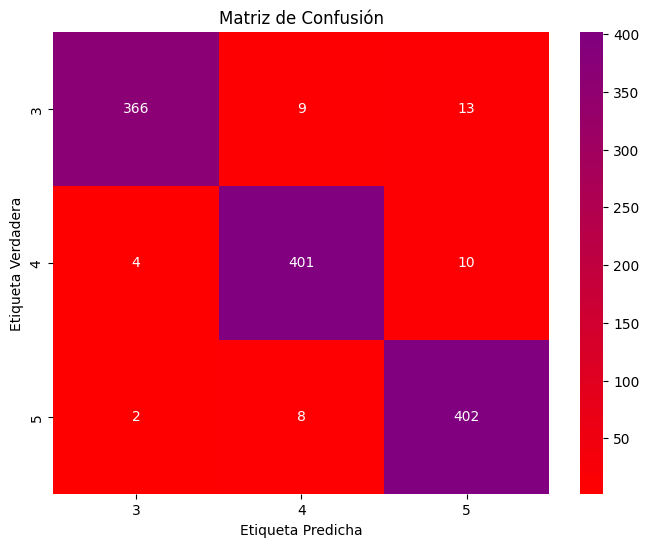

In [39]:
# Importar métricas adicionales
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Mostrar el reporte de clasificación en una tabla
print("\nReporte de Clasificación:\n")
print(df_report)

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))

colors = ["red", "purple", ]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()


## 3.2 Naive Bayes usando TF-IDF

In [40]:
# Importar las librerías necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 1: Separar los datos en entrenamiento y prueba
X_data, y_data = ods_data['words'], ods_data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Paso 2: Aplicar TF-IDF
tfidf = TfidfVectorizer()

# Transformar el texto en TF-IDF para entrenamiento y prueba
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Paso 3: Crear y entrenar el modelo Naive Bayes
naive_bayes_tfidf = MultinomialNB()
naive_bayes_tfidf.fit(X_train_tfidf, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred_tfidf = naive_bayes_tfidf.predict(X_test_tfidf)

# Paso 5: Evaluar el modelo con el informe de clasificación
classification_report_tfidf_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)

# Convertir el informe de clasificación a un DataFrame
classification_report_df = pd.DataFrame(classification_report_tfidf_dict).transpose()

# Paso 6: Mostrar los resultados organizados en tabla
print("Informe de Clasificación (en tabla):")
print(classification_report_df.style.format("{:.2f}"))

classification_report_df.style.format("{:.2f}")



Informe de Clasificación (en tabla):


,precision,recall,f1-score,support
3,0.99,0.94,0.97,388.00
4,0.98,0.98,0.98,415.00
5,0.94,0.98,0.96,412.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.97,0.97,1215.00
weighted avg,0.97,0.97,0.97,1215.00


##3.3 KNN

###3.3.2 CountVectorizer

Primero, intentamos el CountVectorizer

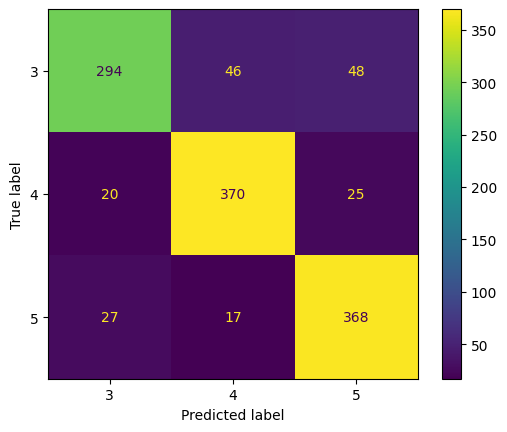

              precision    recall  f1-score   support

           3       0.86      0.76      0.81       388
           4       0.85      0.89      0.87       415
           5       0.83      0.89      0.86       412

    accuracy                           0.85      1215
   macro avg       0.85      0.85      0.85      1215
weighted avg       0.85      0.85      0.85      1215

Precision: 0.850157518760476
Recall: 0.8493827160493828
F1-score: 0.8482220755246321
Accuracy: 0.8493827160493828


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the 'words' column
X = vectorizer.fit_transform(ods_data['words'])

# Convert the sparse matrix to a dense array
X_array = X.toarray()

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_array, y_data, test_size=0.3, random_state=0)


neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred = neigh.predict(X_test)

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=neigh.classes_)
disp.plot()
plt.show()

# Mostrar reporte de clasificacion
print(classification_report(y_test, y_pred))

# Mostrar metricas
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))

Validacion K Particiones

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Lista de Hiperparametros a afinar
n_neighbors = list(range(1,10))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))
p=[1,2]

# Convertir a diccionario
hyperparameters = dict(n_neighbors=n_odd_neighbors, p=p)

# Crear nuevo objeto KNN
knn_2 = KNeighborsClassifier()

# Usar GridSearch
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=10)

# Hacerle fit al modelo
mejor_modelo_knn.fit(X_train, y_train)

# Imprimir el valor de los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(mejor_modelo_knn.best_params_)
print("Mejor puntuación de validación cruzada:")
print(mejor_modelo_knn.best_score_)

Mejores hiperparámetros encontrados:
{'n_neighbors': 9, 'p': 2}
Mejor puntuación de validación cruzada:
0.873327775842333


In [43]:
# Obtener el mejor modelo
neigh_final = mejor_modelo_knn.best_estimator_

# Probar este modelo sobre train y sobre test
y_pred_train = neigh_final.predict(X_train)
y_pred_test = neigh_final.predict(X_test)

# Mostrar accuracy
print("Exactitud en el conjunto de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Exactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred_test))

Exactitud en el conjunto de entrenamiento: 0.9100211714890614
Exactitud en el conjunto de prueba: 0.8765432098765432


In [44]:
probabilidades = neigh_final.predict_proba(X_test)

# Imprimir las probabilidades para el primer dato del conjunto de prueba
print(probabilidades[0])

[0.22222222 0.11111111 0.66666667]


###3.3.1 TF-IDF

Ahora, intentamos usando TF-IDF

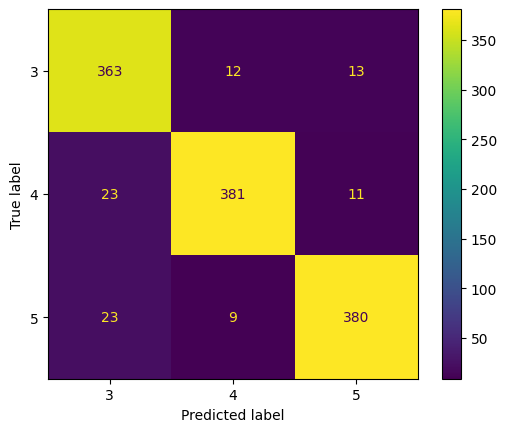

              precision    recall  f1-score   support

           3       0.89      0.94      0.91       388
           4       0.95      0.92      0.93       415
           5       0.94      0.92      0.93       412

    accuracy                           0.93      1215
   macro avg       0.93      0.93      0.92      1215
weighted avg       0.93      0.93      0.93      1215

Precision: 0.9260967129122178
Recall: 0.9251028806584363
F1-score: 0.9252866636886908
Accuracy: 0.9251028806584363


In [45]:
# Importar las librerías necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 1: Separar los datos en entrenamiento y prueba
X_data, y_data = ods_data['words'], ods_data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Paso 2: Aplicar TF-IDF
tfidf = TfidfVectorizer()

# Transformar el texto en TF-IDF para entrenamiento y prueba
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Paso 3: Aplicar el clasificador
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train_tfidf, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred = neigh.predict(X_test_tfidf)

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=neigh.classes_)
disp.plot()
plt.show()

# Mostrar reporte de clasificacion
print(classification_report(y_test, y_pred))

# Mostrar metricas
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))

Validacion K Particiones

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Lista de Hiperparametros a afinar
n_neighbors = list(range(1,10))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))
p=[1,2]

# Convertir a diccionario
hyperparameters = dict(n_neighbors=n_odd_neighbors, p=p)

# Crear nuevo objeto KNN
knn_2 = KNeighborsClassifier()

# Usar GridSearch
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=10)

# Hacerle fit al modelo
mejor_modelo_knn.fit(X_train_tfidf, y_train)

# Imprimir el valor de los mejores hiperparametros
print("Mejores hiperparámetros encontrados:")
print(mejor_modelo_knn.best_params_)
print("Mejor puntuación de validación cruzada:")
print(mejor_modelo_knn.best_score_)

Mejores hiperparámetros encontrados:
{'n_neighbors': 9, 'p': 2}
Mejor puntuación de validación cruzada:
0.9368312347583734


In [47]:
# Obtener el mejor modelo
neigh_final = mejor_modelo_knn.best_estimator_

# Probar este modelo sobre train y sobre test
y_pred_train = neigh_final.predict(X_train_tfidf)
y_pred_test = neigh_final.predict(X_test_tfidf)

# Mostrar accuracy
print("Exactitud en el conjunto de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Exactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred_test))

Exactitud en el conjunto de entrenamiento: 0.9555398729710657
Exactitud en el conjunto de prueba: 0.9522633744855967


In [48]:
probabilidades = neigh_final.predict_proba(X_test_tfidf)

# Imprimir las probabilidades para el primer dato del conjunto de prueba
print(probabilidades[2])

[0. 1. 0.]


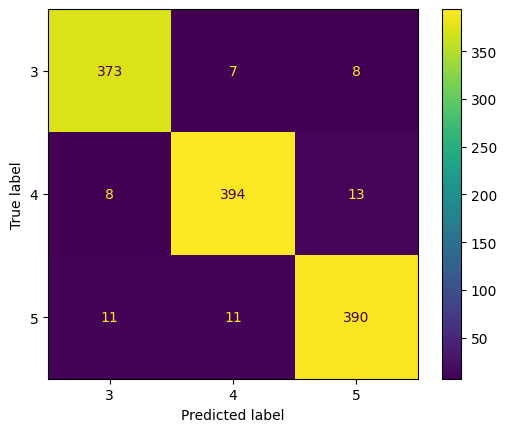

              precision    recall  f1-score   support

           3       0.89      0.94      0.91       388
           4       0.95      0.92      0.93       415
           5       0.94      0.92      0.93       412

    accuracy                           0.93      1215
   macro avg       0.93      0.93      0.92      1215
weighted avg       0.93      0.93      0.93      1215

Precision: 0.9522730162134522
Recall: 0.9522633744855967
F1-score: 0.9522554057156863
Accuracy: 0.9522633744855967


In [49]:
# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred_test)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test), display_labels=neigh.classes_)
disp.plot()
plt.show()

# Mostrar reporte de clasificacion
print(classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

##3.4 Arbol de decision

Con TF-IDF

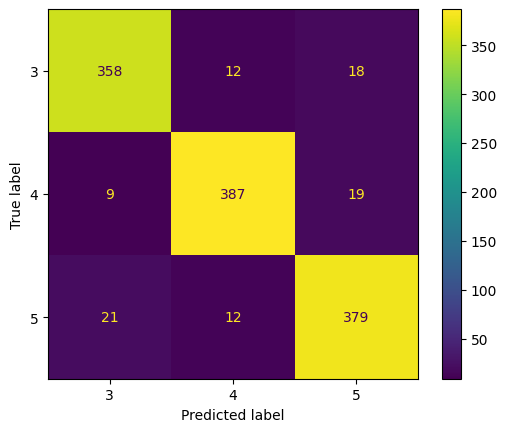

              precision    recall  f1-score   support

           3       0.92      0.92      0.92       388
           4       0.94      0.93      0.94       415
           5       0.91      0.92      0.92       412

    accuracy                           0.93      1215
   macro avg       0.93      0.93      0.93      1215
weighted avg       0.93      0.93      0.93      1215

Precision: 0.9252034506900688
Recall: 0.9251028806584363
F1-score: 0.9251384149261639
Accuracy: 0.9251028806584363


In [50]:
from sklearn.tree import DecisionTreeClassifier

# Crear el objeto de arbol de decision. Criterio de pureza la entropia
arbol = DecisionTreeClassifier(random_state=0)

# Entrenar el modelo de arbol de decision con los datos de entrenamiento
arbol = arbol.fit(X_train_tfidf, y_train)

# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test_tfidf)

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=neigh.classes_)
disp.plot()
plt.show()

# Mostrar reporte de clasificacion
print(classification_report(y_test, y_pred))

# Mostrar metricas
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))


Validacion KFold

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

particiones = KFold(n_splits=10, shuffle=True, random_state=0)

param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[4,6,8,10,20], 'min_samples_split':[2,3,4,5]}

arbol = DecisionTreeClassifier(random_state=0)

mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)

mejor_modelo.fit(X_train_tfidf, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [52]:
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4}

In [53]:
arbol_final = mejor_modelo.best_estimator_

y_pred_train = arbol_final.predict(X_train_tfidf)
y_pred_test = arbol_final.predict(X_test_tfidf)

print("Exactitud en el conjunto de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Exactitud en el conjunto de prueba:", accuracy_score(y_test, y_pred_test))

Exactitud en el conjunto de entrenamiento: 0.9932956951305575
Exactitud en el conjunto de prueba: 0.9308641975308642


Predicciones y probabilidad

In [54]:
# Obtener la probabilidad de que un dato sea clasificado como de una clase particular
probabilidades = arbol_final.predict_proba(X_test_tfidf)

# Imprimir las probabilidades para el primer dato del conjunto de prueba
print(probabilidades[0])


[0. 0. 1.]


In [55]:
arbol_final.classes_

array([3, 4, 5])

##3.5 Random Forest con TF-IDF

Exactitud del modelo: 0.9786
              precision    recall  f1-score   support

           3       0.99      0.97      0.98       388
           4       0.97      0.98      0.98       415
           5       0.98      0.98      0.98       412

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



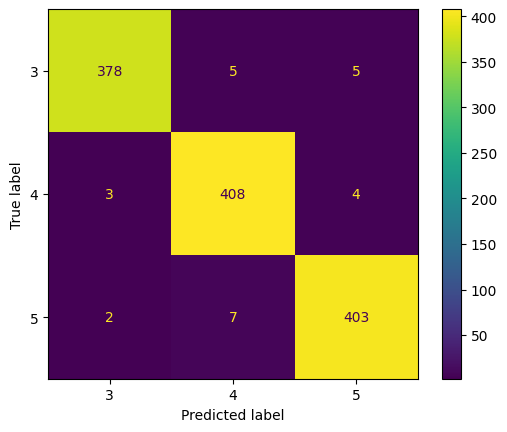

In [56]:

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Paso 1: Separar los datos en entrenamiento y prueba
X_data, y_data = ods_data['words'], ods_data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Paso 2: Aplicar TF-IDF
tfidf = TfidfVectorizer()

# Transformar el texto en TF-IDF para entrenamiento y prueba
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Paso 3: Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_tfidf, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred = rf_model.predict(X_test_tfidf)

# Paso 5: Evaluar el modelo con el informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf_model.classes_)
disp.plot()
plt.show()


##3.5 Random Forest con CountVectorizer

Exactitud del modelo: 0.9621

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.98      0.94      0.96       388
           4       0.96      0.97      0.96       415
           5       0.95      0.98      0.96       412

    accuracy                           0.96      1215
   macro avg       0.96      0.96      0.96      1215
weighted avg       0.96      0.96      0.96      1215


Reporte de Clasificación:

              precision    recall  f1-score     support
3              0.983871  0.943299  0.963158   388.00000
4              0.959330  0.966265  0.962785   415.00000
5              0.945882  0.975728  0.960573   412.00000
accuracy       0.962140  0.962140  0.962140     0.96214
macro avg      0.963028  0.961764  0.962172  1215.00000
weighted avg   0.962607  0.962140  0.962154  1215.00000


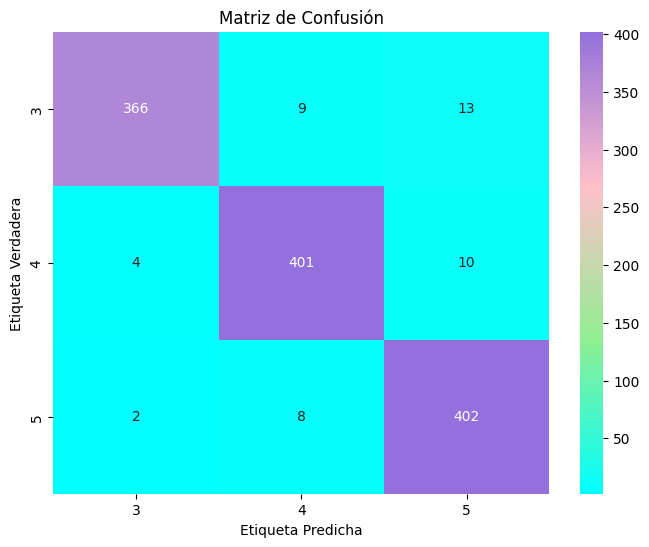

In [57]:

import pandas as pd
import matplotlib.pyplot as plt
# Separar features (X) y etiquetas (y)
X_data = ods_data['words']
y_data = ods_data['sdg']

# Dividir los datos en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Vectorización binaria con CountVectorizer
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Inicializar y entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Hacer predicciones
y_pred = nb_model.predict(X_test_vec)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importar métricas adicionales

# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Mostrar el reporte de clasificación en una tabla
print("\nReporte de Clasificación:\n")
print(df_report)

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))

colors = ['cyan','lightgreen','pink', 'mediumpurple' ]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()


##3.7 Logistic Regression


Exactitud del modelo: 0.9621
Informe de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.99      0.97      0.98       388
           4       0.98      0.99      0.98       415
           5       0.97      0.97      0.97       412

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



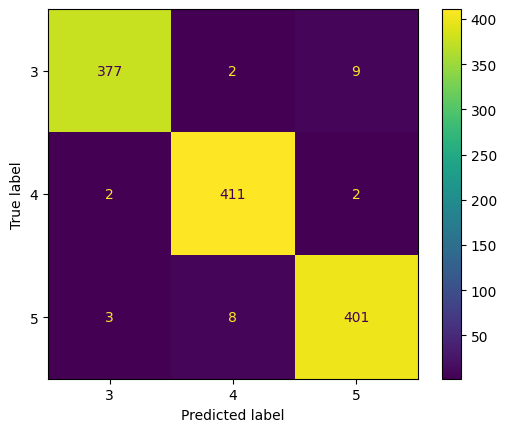

Exactitud del modelo: 0.978601


In [58]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Paso 1: Separar los datos en entrenamiento y prueba
X_data, y_data = ods_data['words'], ods_data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Paso 2: Aplicar TF-IDF
tfidf = TfidfVectorizer()

# Transformar el texto en TF-IDF para entrenamiento y prueba
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Paso 3: Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)  # Ajustar max_iter si es necesario
logistic_model.fit(X_train_tfidf, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred = logistic_model.predict(X_test_tfidf)

# Paso 5: Evaluar el modelo con el informe de clasificación
print(f"Exactitud del modelo: {accuracy:.4f}")
print(f"Informe de Clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred))

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=logistic_model.classes_)
disp.plot()
plt.show()

# Calcular la exactitud con más decimales
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.6f}")


##3.8 Redes Neuronales

Exactitud del modelo: 0.9770
Informe de Clasificación para Redes Neuronales (MLPClassifier):
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       388
           4       0.98      0.98      0.98       415
           5       0.97      0.97      0.97       412

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



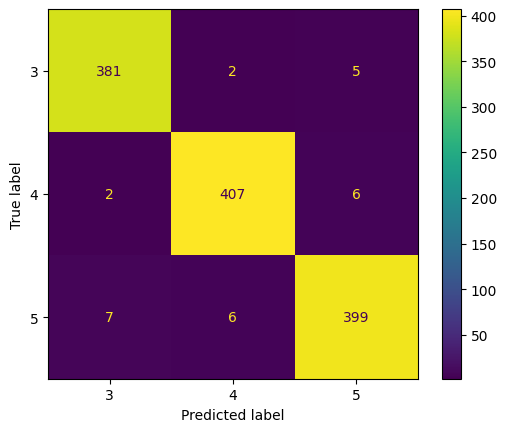

In [59]:

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Paso 1: Separar los datos en entrenamiento y prueba
X_data, y_data = ods_data['words'], ods_data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

# Paso 2: Aplicar TF-IDF
tfidf = TfidfVectorizer()

# Transformar el texto en TF-IDF para entrenamiento y prueba
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Paso 3: Crear y entrenar el modelo de Redes Neuronales (MLPClassifier)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)

# Paso 4: Predecir los resultados sobre el conjunto de prueba
y_pred = mlp_model.predict(X_test_tfidf)

# Paso 5: Evaluar el modelo con el informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")
print(f"Informe de Clasificación para Redes Neuronales (MLPClassifier):")
print(classification_report(y_test, y_pred))

# Se genera la matriz de confusion
confusion_matrix(y_test, y_pred)

# Se puede visualizar la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=mlp_model.classes_)
disp.plot()
plt.show()


#4 Análisis de las palabras

Top 10 de palabras

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizar la columna 'words'
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(ods_data['words'])

# Obtener los nombres
feature_names = tfidf.get_feature_names_out()

# Agrupar los datos por el ODS
sdg_tfidf = {}
for sdg in ods_data['sdg'].unique():
  indices = ods_data[ods_data['sdg'] == sdg].index
  tfidf_sum = tfidf_matrix[indices].sum(axis=0)
  sdg_tfidf[sdg] = dict(zip(feature_names, tfidf_sum.tolist()[0]))

# Buscar top 10 palabras para cada ODS
for sdg, word_scores in sdg_tfidf.items():
  sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
  print(f"Top 10 words for SDG {sdg}:")
  for word, score in sorted_words[:10]:
    print(f"\t{word}: {score:.4f}")
  print("\n")

Top 10 words for SDG 3:
	salud: 113.1121
	atencion: 93.7410
	mil: 59.0450
	dos: 54.8236
	mas: 46.4280
	mental: 41.8805
	medic: 30.2746
	servici: 27.3907
	servicios: 25.9235
	pacient: 24.9055


Top 10 words for SDG 4:
	educ: 61.1385
	dos: 54.6140
	mil: 53.0002
	mas: 49.7609
	estudi: 49.5166
	escuel: 49.4217
	educacion: 47.3623
	estudiantes: 42.5646
	ocde: 37.3995
	superior: 37.0521


Top 10 words for SDG 5:
	mujer: 99.4214
	mujeres: 92.0246
	genero: 64.0221
	gener: 62.9896
	mil: 62.0411
	dos: 55.4415
	mas: 53.2653
	hombr: 34.1485
	trabaj: 33.3184
	hombres: 33.1439




Nube de palabras

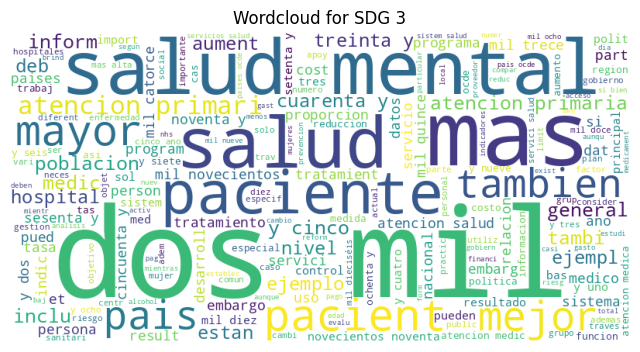

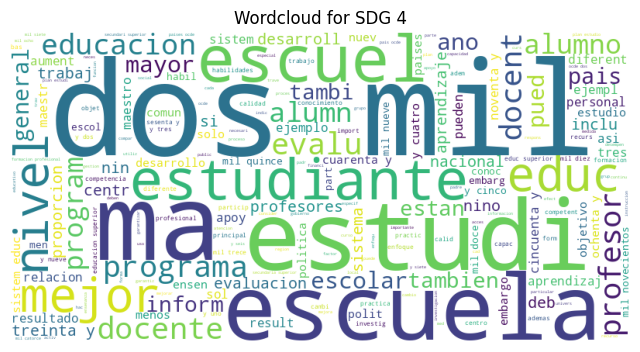

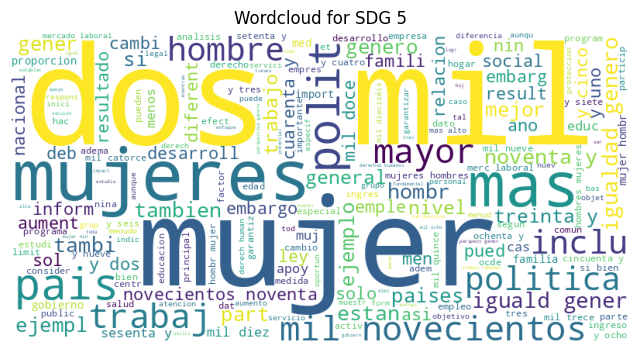

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# AGrupar datos por ODS
sdg_text = ods_data.groupby('sdg')['words'].apply(lambda x: ' '.join(x))

# Mostrar nube de palabras para cada ODS
for sdg, text in sdg_text.items():
  wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

  plt.figure(figsize=(8, 8), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(f"Wordcloud for SDG {sdg}")
  plt.show()